# <center>Watson Wireless Use Case</center>

<center><font size="3">This is the analysis of the first case from the Data Science Challenges<br> Done by: <b>Walid Ismail (wismail@eg.ibm.com)</b></font?</center><br><br>

# 0. Introduction
Watson Wireless (WW) is a telecommunications firm serving regional markets in Brazil and Argentina. Recently WW has struggled with revenue contraction as customers move to other competitors. WW leadership has prioritized reducing customer churn in the next period. WW seeks answers to the following key questions:

1)	What are the most important drivers of customer churn?<br>2)	What are 2-3 recommendations for how WW can use this information to reduce customer churn in the future?

# 1. Get the Watson Studio project token to use it to access the dataset

In [482]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='01cb8ab3-b48d-441d-8d33-edc6caae425d', project_access_token='p-d36f9300425b2c63be8cd6c20d68a07ef91ec977')
pc = project.project_context

In [483]:
# Import main needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")
sns.set_style("ticks")

# 2. Load the data file

In [484]:
pd.set_option('display.width', 3000)
pd.set_option('display.max.columns', 500) # display up to 500 colums without "..." use horizontal scrolling instead
pd.set_option('display.max.rows', 50)

# Fetch the Customer file
my_file = project.get_file("telco.csv")

# Read the EXCEl data file from the object storage into a pandas DataFrame
my_file.seek(0)
ww_df = pd.read_csv(my_file)
print("\nNumber of customers: {}".format(len(ww_df)))
ww_df.head()


Number of customers: 1000


,region,tenure,age,marital,address,income,ed,employ,gender,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,confer,ebill,custcat,churn
0,2,13,44,1,9,64,4,5,0,0,0,1,0,0,0,0,0,0,0,0,1,1
1,3,11,33,1,7,136,5,5,0,1,0,1,1,0,1,1,0,1,1,0,4,1
2,3,68,52,1,24,116,1,29,1,1,0,1,0,0,0,0,0,1,1,0,3,0
3,2,33,33,0,12,33,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
4,2,23,30,1,9,30,1,2,0,0,0,0,0,0,0,0,0,1,1,0,3,0


# 3. Exploratory Data Analysis
Lets now look at some exploratory information about our dataset and the variables in it to get a flovor of its different aspects. We will look at:<br>
- Number of observations<br>
- Number of columns<br>
- Types of columns<br>
- Does our dataset has empty cells or not?<br>
- Is our dataset balanced or skewed?
- Correlations between variables<br>
- Descriptive statistics for each variable

In [485]:
ww_df.shape # dimensions of data set

(1000, 22)

In [486]:
ww_df.isnull().sum() # check if any cells have missing values

region      0
tenure      0
age         0
marital     0
address     0
income      0
ed          0
employ      0
gender      0
tollfree    0
equip       0
callcard    0
wireless    0
multline    0
voice       0
pager       0
internet    0
callid      0
confer      0
ebill       0
custcat     0
churn       0
dtype: int64

In [487]:
ww_df.info() # check data type of each field

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
region      1000 non-null int64
tenure      1000 non-null int64
age         1000 non-null int64
marital     1000 non-null int64
address     1000 non-null int64
income      1000 non-null int64
ed          1000 non-null int64
employ      1000 non-null int64
gender      1000 non-null int64
tollfree    1000 non-null int64
equip       1000 non-null int64
callcard    1000 non-null int64
wireless    1000 non-null int64
multline    1000 non-null int64
voice       1000 non-null int64
pager       1000 non-null int64
internet    1000 non-null int64
callid      1000 non-null int64
confer      1000 non-null int64
ebill       1000 non-null int64
custcat     1000 non-null int64
churn       1000 non-null int64
dtypes: int64(22)
memory usage: 172.0 KB


In [488]:
ww_df.churn.value_counts() # is our dataset balanced? or is it skewed with more observations for a certain outcome?

0    726
1    274
Name: churn, dtype: int64

In [489]:
# view correlations between variables as a heat map, useful mainly for numeric variables (not binary variables)
plt.figure(figsize=(20, 20))
#sns.heatmap(ww_df.corr(), cmap="Blues", annot=True, fmt=".2f") 

In [490]:
ww_df.describe() # view statisical measures of variables

,region,tenure,age,marital,address,income,ed,employ,gender,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,confer,ebill,custcat,churn
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.517000,0.474000,0.386000,0.678000,0.296000,0.475000,0.304000,0.2610,0.368000,0.481000,0.502000,0.371000,2.487000,0.274000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.499961,0.499573,0.487074,0.467477,0.456719,0.499624,0.460213,0.4394,0.482503,0.499889,0.500246,0.483314,1.120306,0.446232
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# 4. Feature Engineering / Data Preparation
From our data inspection we can observe the following about the variables / features / target:
<ul>
    <li>We have 22 attribuites in our dataset (21 possible features and one target)</li>
    <li>Since WW Communications is seeking information on key drivers for customer churn, then our target variable for this analysis will be the variable <b>churn</b></li>
    <li>All attributes are in numeric format.</li>
    <li>We have <b>four</b> numeric variables that are continious in nature <b>(age, income, employ, tenure)</b>. These variables will require scaling before they are used in modeling</li>
    <li><b>Three</b> numeric variables <b>region, address, ed</b> that are numeric encoding of categorical variables so they only need scaling.</li>
    <li><b>Fourteen</b> variables <b>(marital, gender, tollfree, equip, callcard, wireless, multline, voice, pager, internet, callid, confer, ebill, custcat)</b> that are categroical in nature and are already encoded as <b>0,1</b> so there is no need for any further conversions or preprocessing on these variables</li>
    <li>Our target variable <b>churn</b> is also encoded as <b>0,1</b> so it is already prepared for modeling</li>
    <li>As seen above our dataset is skewed with much more observations for churn=0 than churn=1 (726 observations to only 274). This means that our model will probably be more accurate at predicting churn=0 correctly than churn=1. Ideally we should have a dataset that is balanced with nearly equal numbers of observations for the two values of our target label.</li>
</ul>

# 5. Feature Selection
We are going to use several methods to try and discover the features that will be strong predictors for customer churn. Specifically we will try the following techniques:

- Cross Tabulations: this should help us identify which features qualify as a predictors for customer churn. It mainly helps with nominal features but can provide insight for continious features as well if we divide the continious feature into bins
- Correlations: this will help identify features pairs that are strongly correlated with each other (not with churn) so that we can remove one feature of them
- SelectKBest method: this is a scikit learn object that ranks a list of features according to their predictice impact by assigning a score to each feature

## 5.1 Cross Tabulation for nominal features
First let us check the 13 nominal features that we have in the dataset against customer churn. The nominal features are as follows:
    <b>marital, gender, tollfree, equip, callcard, wireless, multline, voice, pager, internet, callid, confer, ebill</b>

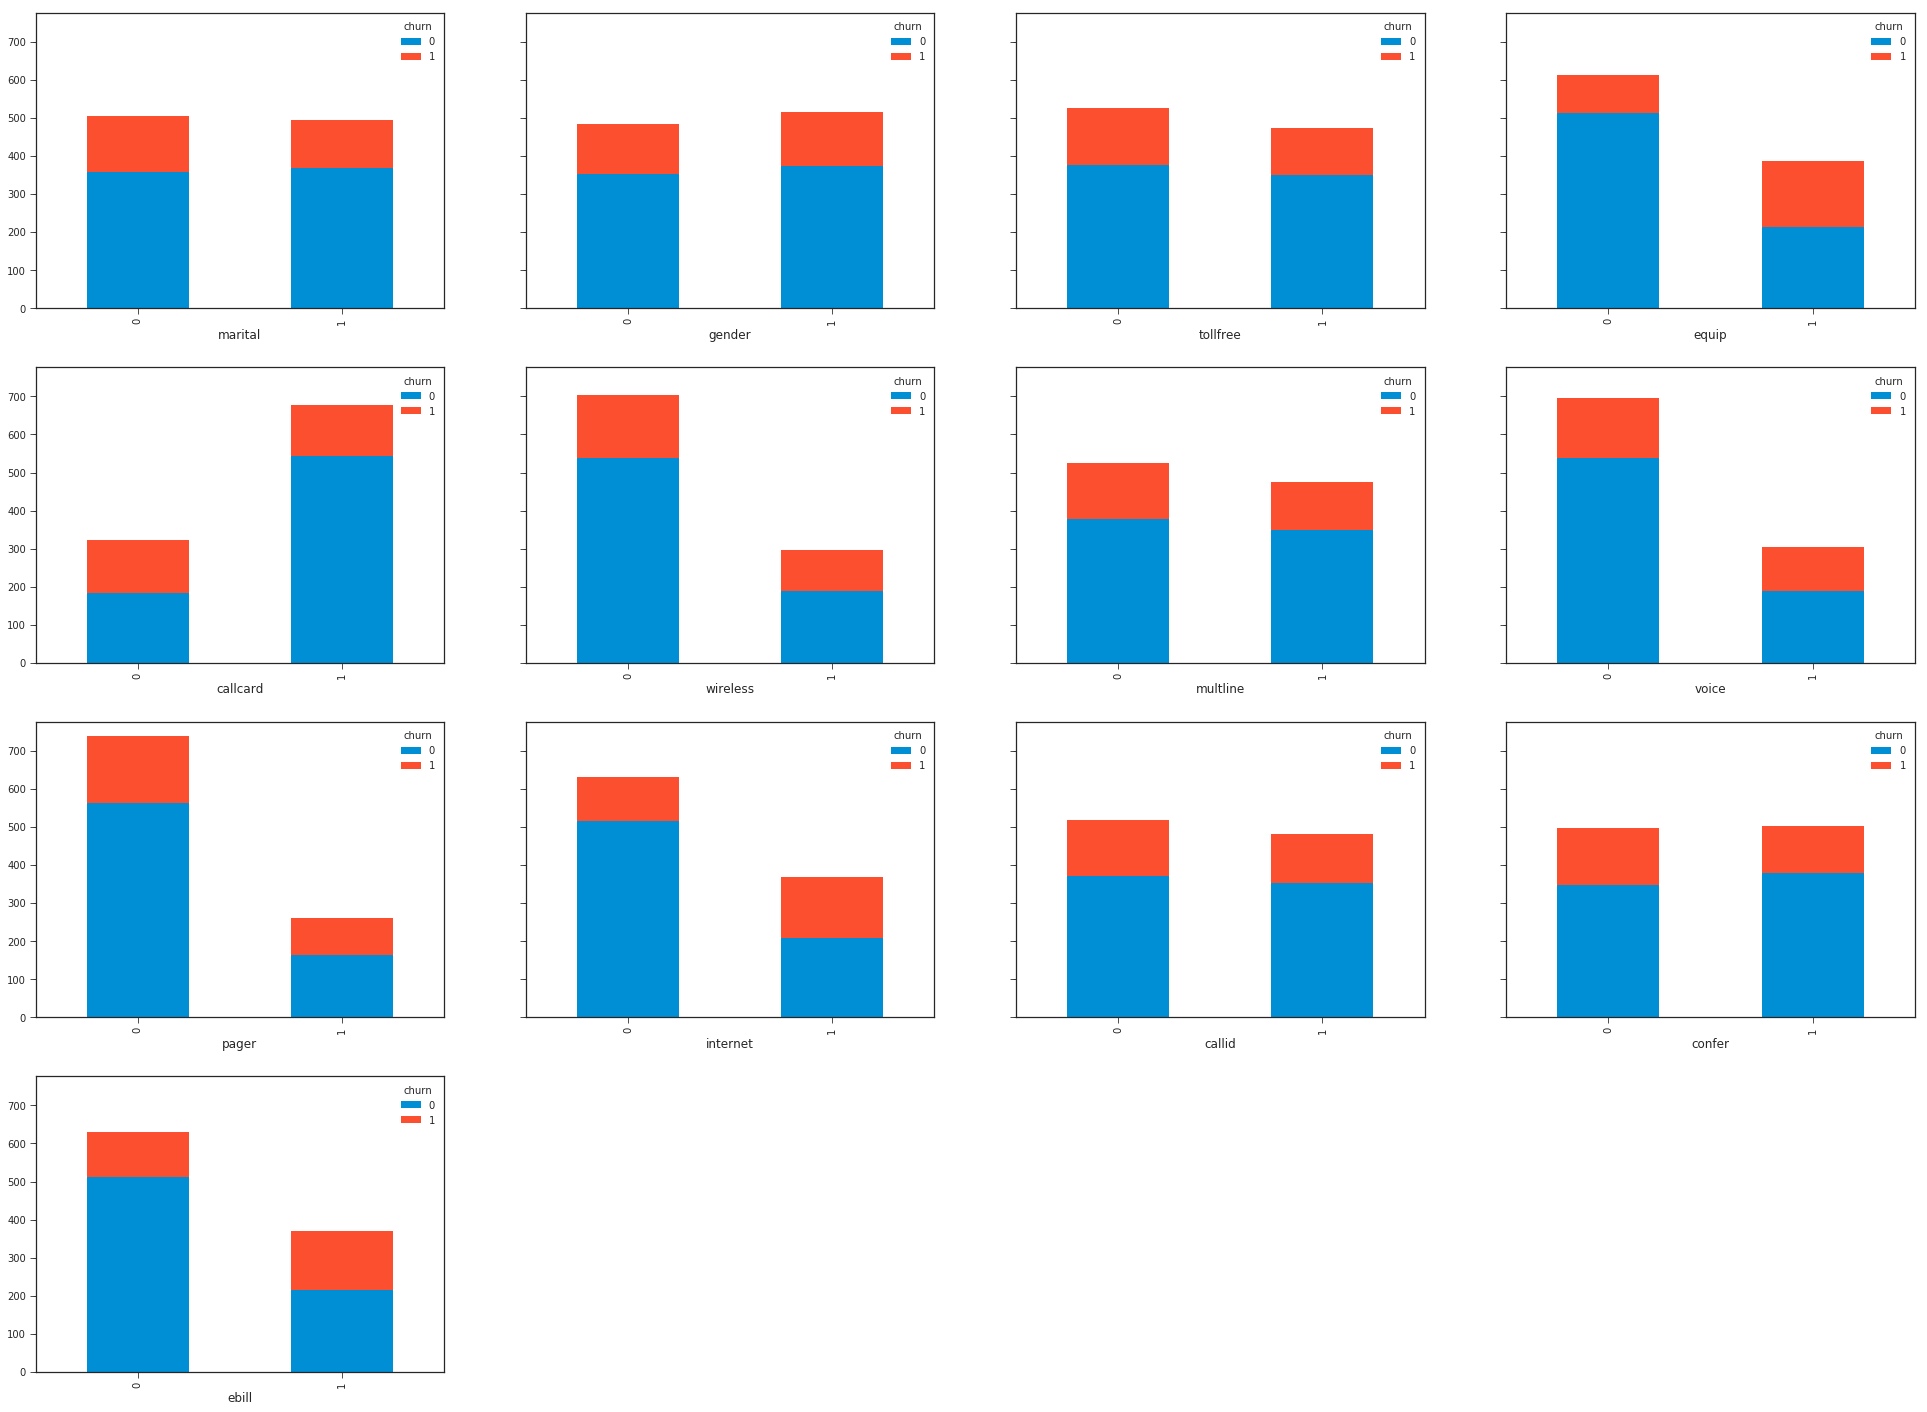

In [491]:
nominal_features = ['marital', 'gender', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'confer', 'ebill']
target_feature = 'churn'

#from scipy import stats
#tab = pd.crosstab(ww_df['equip'], ww_df['callcard'])
#print(tab)
#print(stats.chi2_contingency(tab))

fig, axs = plt.subplots(4, 4, sharex=False, sharey=True, figsize=(30,25))

for i, feat in enumerate(nominal_features):
    #bins = pd.cut(ww_df['age'], bins=5)
    tab = pd.crosstab(ww_df[feat], ww_df[target_feature], margins=True)
    tab = tab.drop('All',axis=1)
    tab = tab.drop('All',axis=0)
    ax = tab.plot(kind='bar', stacked = True, ax = axs[int(i/4), int(i%4)])
     
for i in range(13, 16):
    fig.delaxes(axs[int(i/4), int(i%4)])
   
plt.show()

The cross tabulation above provides the following information about the relationship between each of the nominal features and churn:
<ul>
    <li>Each of the features <b>marital, gender, tollfree, multline, callid, confer</b> have the same distribution whether they are 0 or 1 on customer churn so we can conclude that they will be <b>weak</b> predictors for customer churn &#x274C;</li>
    <li>Each of the features <b>equip, internet, ebill</b> have same distribution when they are 0 vs 1 on customer churn so we should take only one of them and use as a predictor. We shall select <b>equip</b></li>
    <li>Each of the features <b>wireless, voice, pager</b> have same distribution when they are 0 vs 1 on customer churn so we should take only one of them and use as a predictor. We shall select <b>wireless</b></li>
    <li><b>Callcard</b> havs an opposite distribution to all other nominal features where churn decreases as customer buy callcards. Accordingly, we shall select <b>callcard</b> as a predictor</li>       
</ul>

## 5.2 Cross Tabulation for numeric features (except income)
Next we check the 8 numeric features that we have in the dataset against customer churn. The numeric features are as follows:
    <b>region, tenure, age, address, income, ed, employ, custcat</b>

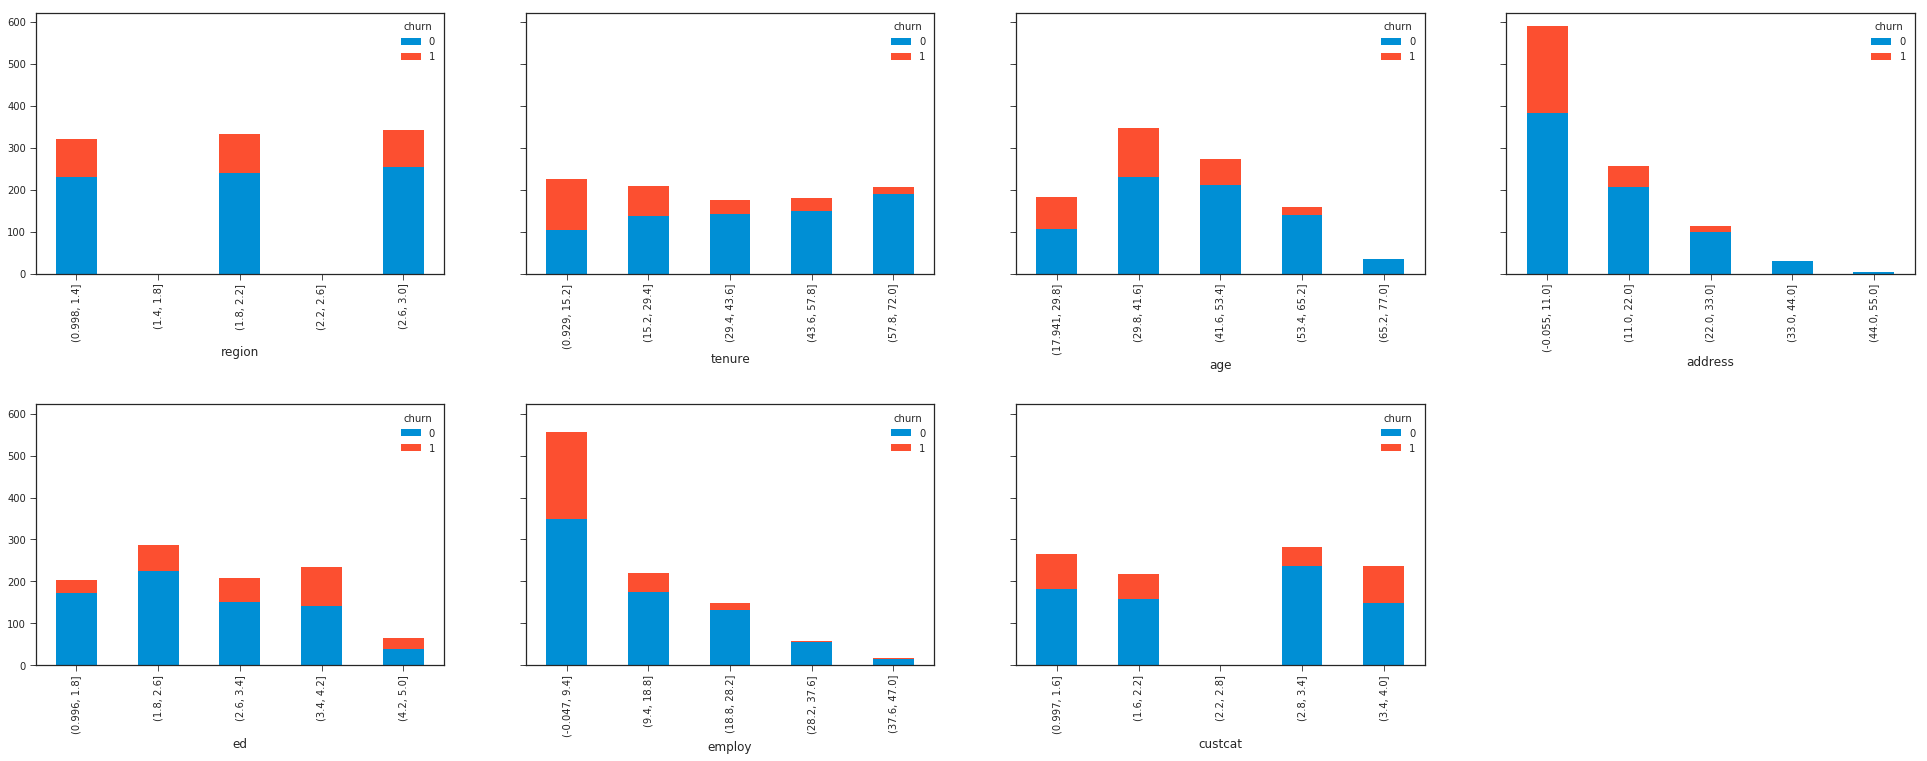

In [492]:
numeric_features = ['region', 'tenure', 'age', 'address', 'ed', 'employ', 'custcat']
target_feature = 'churn'

fig, axs = plt.subplots(2, 4, sharex=False, sharey=True, figsize=(30,12))
plt.subplots_adjust(hspace=0.5)

for i, feat in enumerate(numeric_features):
    bins = pd.cut(ww_df[feat], bins=5)
    tab = pd.crosstab(bins, ww_df[target_feature], margins=True)
    tab = tab.drop('All',axis=1)
    tab = tab.drop('All',axis=0)
    ax = tab.plot(kind='bar', stacked = True, ax = axs[int(i/4), int(i%4)])
    
for i in range(7, 8):
    fig.delaxes(axs[int(i/4), int(i%4)])   
   
plt.show()

The cross tabulation above provides the following information about the relationship between each of the numeric features and churn:
<ul>
    <li><b>Region</b> is a weak predictor for churn as it has the same distribution against churn across the three avalaible regions so it will be excluded from our modeling &#x274C;</li>
    <li>As <b>tenure</b> increases customer churn decreases as a proportion so we can consider this feature as a predictor</li>
    <li>Similariy as <b>age </b> bracket increases customer churn decreases as a proportion so we can consider this feature as a predictor</li>
    <li>For each of the four customer categories of the feature <b>custcat</b> the distribution against the two states of churn is quite identical so we can consider this feature as weak predictor &#x274C;</li>
    <li>As <b>employ</b> increases we notice that churn is more 0 than 1 so we can consider the feature for modeling</li>
    <li>As <b>address</b> increases we notice that churn is more 0 than 1 so may be some neighbourhoods have lower churn than other so we can consider the feature for modeling as well</li>  
    <li>As <b>ed</b> increases wen see that churn as proportion of the education group increases so based on this we can consider ed as a possible predictor</li>
</ul>

## 5.3 Cross Tabulation for numeric feature "income"
<b>Income</b> is a wide ranging attribute so we will check it by viewing a histogram of its distribution

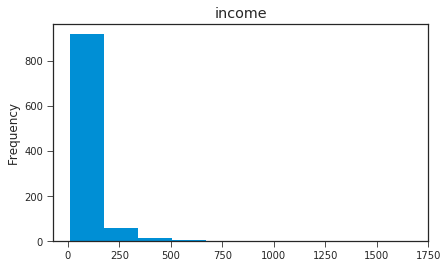

In [493]:
ww_df['income'].plot(kind='hist', title = 'income')

As seen above we notice that income is heavily skewed to the right with a maximum value of 1668 but we also notice that most of the distribution is in the range up to 200 so lets narrow our historgram to that range only as seen below

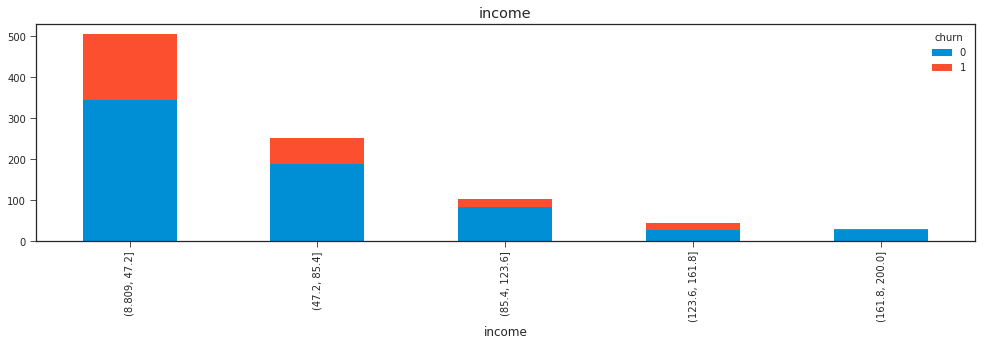

In [494]:
target_feature = 'churn'

income_less_500 = ww_df[ww_df['income'] <= 200]

bins = pd.cut(income_less_500['income'], bins=5)
tab = pd.crosstab(bins, ww_df[target_feature], margins=True)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
tab.plot(kind='bar', stacked = True, figsize=(15,4), title = 'income') 
plt.show()

The modified histogram above shows that as income increases churn as a proportion tends to decrease so this is a pattern that allow us to consider <b>income</b> as a predictor

## 5.4 Correlations
Next we check the Pearsom correlation between the continious features to see if any of the features pairs are highly correlated and as a result we can exclude one of the features of the pairs

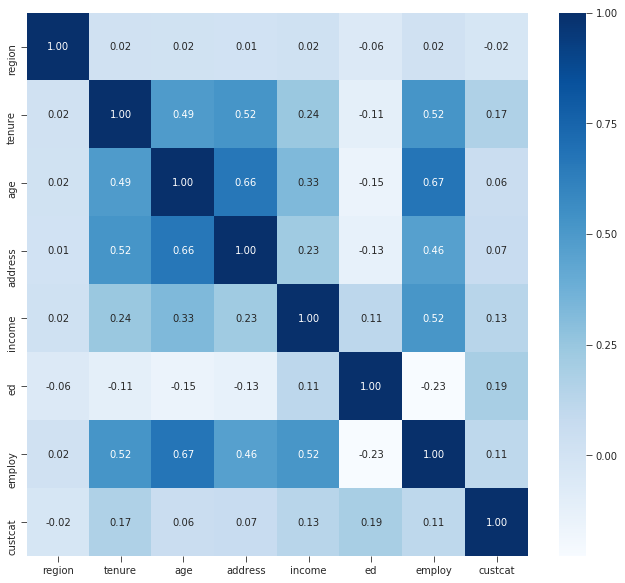

In [495]:
#check for correlations between numeric features. Rule, if two features that are highly correlated one should be dropped

numeric_features = ['region', 'tenure', 'age', 'address', 'income', 'ed', 'employ', 'custcat']
ww_df[numeric_features].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(ww_df[numeric_features].corr(),  cmap="Blues", annot=True, fmt=".2f") 

The heat map above shows a maximum correlation of 0.67 between <b>employ</b> and <b>age</b>. All other features pairs have lower correlation. This correlation is not strong enough to warrant exclusion of any of the numeric features based on correlation alone.

## 5.5 SelectKBest Method
SelectKBest is an object from Scikit Learn library that we can used for automatic feature selection. SelectKBest ranks all features based on their importance as predictors for the target variable using different statistical methods. We use it here as a validation of our selected features. As we can see from the result below, our selected features match the top 6 features ranked by SelectKBest.

In [496]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
pd.set_option('display.expand_frame_repr', False)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data

features = ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'gender', 
            'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'confer', 'ebill', 'custcat']

target = 'churn'

X = ww_df[features]
Y = ww_df[target]
# feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3, suppress=True)
#features = fit.transform(X) # get the array of observations for top 5 features, NICE!!
#print(features)

scored_features = pd.DataFrame({'Feature': features, 'Score' : fit.scores_})
scored_features.sort_values(by = 'Score', ascending=False, inplace=True)
scored_features = scored_features.reset_index(drop=True)
scored_features.head(10)

,Feature,Score
0,tenure,1821.802910
1,income,1231.706013
2,employ,694.966472
3,address,519.891713
4,age,241.608178
5,equip,57.136510
6,internet,46.220353
7,ebill,41.506048
8,ed,23.250195
9,callcard,19.113123


## 5.6 Selected Features
Based on the analysis above we have identified the following features as predictors for <b>churn</b> to be used in our modeling:<br>
- tenure
- age
- income
- employ
- address
- ed
- equip
- wireless
- callcard

# 6. Modeling
In the section we will focus finding the best model in order to predict customer churn for WW Communications. Since <b>churn</b> is a nominal variable (0,1) then our problem is mainly a classification problem. We will try different classification models to see which one yields the highest training accuracy, then we will fine tune our most accurate model in order to arrive at the bet testing accuracy.

## 6.1 Feature Scaling
Before modeling we need to do feature scaling in order to standardize our measurement scale for all numeric features

In [497]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

features = ['tenure', 'age', 'income', 'employ', 'address', 'ed', 'equip', 'wireless', 'callcard']
target = 'churn'

X = ww_df[features]
y = ww_df[target]

# ALWAYS SPLIT FIRST BEFORE SCALING TO AVOID PREDICTOR LEAKAGE !!!!!

#Train Test Split, reserve test subset for finally accuracy and other metrics calculations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train) # fit the scaler on training data then apply to training and test data
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)
print('Done')

Done


## 6.2 Modeling (using different models)
Now lets try three different classification models and see which one yields the best training accuracy. We will try the following three models:
- Logistic Regression
- Support Vector Classifier
- Random Forest Classifier

In [498]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# using specific random state to make sure we always get same accuracy result if we execute this cell multiple times or on multiple machines

logreg = LogisticRegression(random_state=1)
# 10-fold cross-validation, calculating average training accuracy
scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic regression accuracy is:", scores.mean())

svc = svm.SVC(random_state=1)
# 10-fold cross-validation, calculating average training accuracy
scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
print("SVM accuracy is: ", scores.mean())

rc = RandomForestClassifier(random_state=1)
# 10-fold cross-validation, calculating average training accuracy
scores = cross_val_score(rc, X_train, y_train, cv=5, scoring='accuracy')
print("Random forest accuracy is: ", scores.mean())

Logistic regression accuracy is: 0.782857142857
SVM accuracy is:  0.754285714286
Random forest accuracy is:  0.761428571429


## 6.3 Fine tuning the selected model hyperparameters
Since Logistic Regression yielded the best training accuracy then we will select that model as our estimator of churn and now we need to identify the best hyperparameters to initialize the model in order to yield the highest possible testing accuracy

In [499]:
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
import numpy as np

C_options = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
class_weight_options = [None, 'balanced']
param_grid = dict(C = C_options, solver = solver_options, class_weight = class_weight_options)

clf = GridSearchCV(LogisticRegression(), param_grid)

clf.fit(X_train, y_train)

best_model = clf.best_estimator_
best_model

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

# 7. Model Evaluation
In this section we check the tuned model testing accuracy. We also take a look at the relative importance of the model features in predicting customer churn. We conclude with an overview of the confusion matrix

## 7.1 Testing accuracy

In [500]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report

print('\nAccuracy of tuned model on test set: {0:.2f}\n'.format(best_model.score(X_test, y_test)))

print(classification_report(y_test, y_pred))


Accuracy of tuned model on test set: 0.76

             precision    recall  f1-score   support

          0       0.79      0.90      0.84       211
          1       0.65      0.44      0.52        89

avg / total       0.75      0.76      0.75       300



## 7.2 Displaying the modeling predictors sorted by coefficent
In this section we take a look at the influence of the model features on customer churn.<br>
- Features with +ve coefficient drive customer churn (i.e. churn = 1)
- Features with -ve coefficient drive customer retention (i.e churn = 0)

In [501]:
import pandas as pd

# model is the trained model
importances = best_model.coef_[0]
print(importances)

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': features, 
                                'importance': importances})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)


[-2.296  0.817  1.704 -1.184 -1.896  0.772  0.916  0.336 -0.615]


,feature,importance
0,income,1.703922
1,equip,0.916118
2,age,0.817108
3,ed,0.771740
4,wireless,0.336260
5,callcard,-0.615379
6,employ,-1.184056
7,address,-1.896340
8,tenure,-2.296435


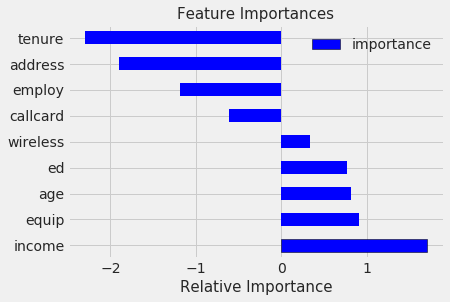

In [502]:
plt.figure(figsize=(12, 6))
plt.style.use('fivethirtyeight')

# Plot the most important features in a horizontal bar chart
feature_results.plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue')
plt.xlabel('Relative Importance', size = 15)
plt.ylabel('')
plt.title('Feature Importances', size = 15)
plt.show()


## 7.3 Confsuion Matrix
Finally we take a look the resulting confusion matrix and evaluate our model performance in predicting customer churn vs retention. Specifically we will exanme the following metrics:

Precision (the positive predictive value) = TP / (TP+FP)
<br>
Specificity (the true negative rate) = TN / (FP+TN)
<br>
Accuracy (the fraction of the total sample that is correctly identified) = (TP+TN) / (TP+TN+FP+FN)


In [503]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy = 0.76
Precision = 0.65
Specifity = 0.90
Confusion matrix, without normalization
[[ 39  50]
 [ 21 190]]


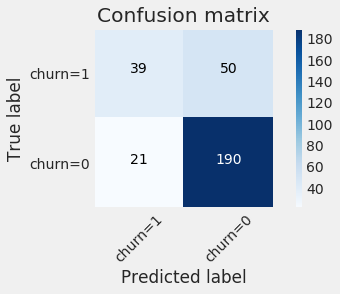

In [504]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, [1, 0])
np.set_printoptions(precision=2)

tp, fn, fp, tn = cnf_matrix.ravel()

accuracy = (tn+tp) / (tn + fp + fn + tp)
precision = tp / (tp+fp)
specifity = tn / (fp+tn)

print("Accuracy = {0:.2f}".format(accuracy))
print("Precision = {0:.2f}".format(precision))
print("Specifity = {0:.2f}".format(specifity))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],  title='Confusion matrix')

# 8. Conclusions and Recommendations
Based on our analysis we provide the following conclusions and recommendations for the future:
- The strongest three predictors affecting consumer retention (churn = 0) are as follows:
    - tenure
    - address
    - employ
- The strongest three predictors affecting consumer churn are as follows:
    - income
    - equip
    - age
- Our model is better at predicting retention (churn = 0) than churn (churn = 1). This is due to the dataset containing more observations with churn=0 than churn=1. Our model should become better at predicting churn if the dataset is updated with more observations for +ve churn customers
- Customers in certain address code (range 0-11) have a high churn percentage. This could be due to network issues in theses areas. Futher investigation is advised
- Customers in low income range (0-47) are more likely to leave WW. Further analysis is advised on price plans for these customers
- Customers who have equip = 1 are more likely to leave WW. Futher analysis advised to uncover reasons for this
- Customers with high years of education and employment are more loyal. Should proivde more incentives to attract these types of customers